# 4.10 Part 2

## Task 8 Continued

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? (Continued)

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Users\rlink\Documents\Instacart Basket Analysis'

In [7]:
big_ords_prods_agg_cust = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'big_ords_prods_agg_cust.pkl'))

In [9]:
df_dept = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'df_dept.pkl'))

In [11]:
big_ords_prods_agg_cust_dept = big_ords_prods_agg_cust.merge(df_dept,on='department_id',indicator=True)

In [13]:
big_ords_prods_agg_cust_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data','big_ords_prods_agg_cust_dept.pkl'))

In [15]:
big_ords_prods_agg_cust_dept['department'].value_counts()

department
produce            5688829
dairy eggs         3239210
snacks             1732921
beverages          1612544
frozen             1339316
pantry             1125798
bakery              704247
canned goods        640476
deli                630348
dry goods pasta     520228
household           443084
meat seafood        425637
breakfast           422473
personal care       269158
babies              253871
international       161571
alcohol              92263
pets                 58788
missing              41460
other                21758
bulk                 20685
Name: count, dtype: int64

### Create department bar chart

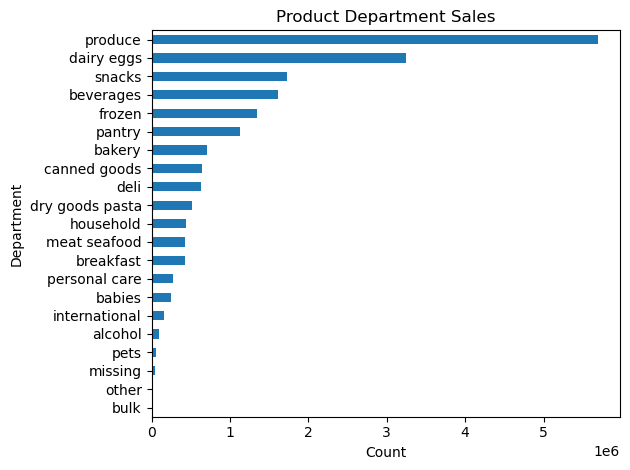

In [18]:
dept_bar = big_ords_prods_agg_cust_dept['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [20]:
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_product_bar.png'))

### Create crosstab and bar chart to compare age_group profile with departments

In [23]:
age_department_comparison = pd.crosstab(big_ords_prods_agg_cust_dept['age_group'],big_ords_prods_agg_cust_dept['department'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

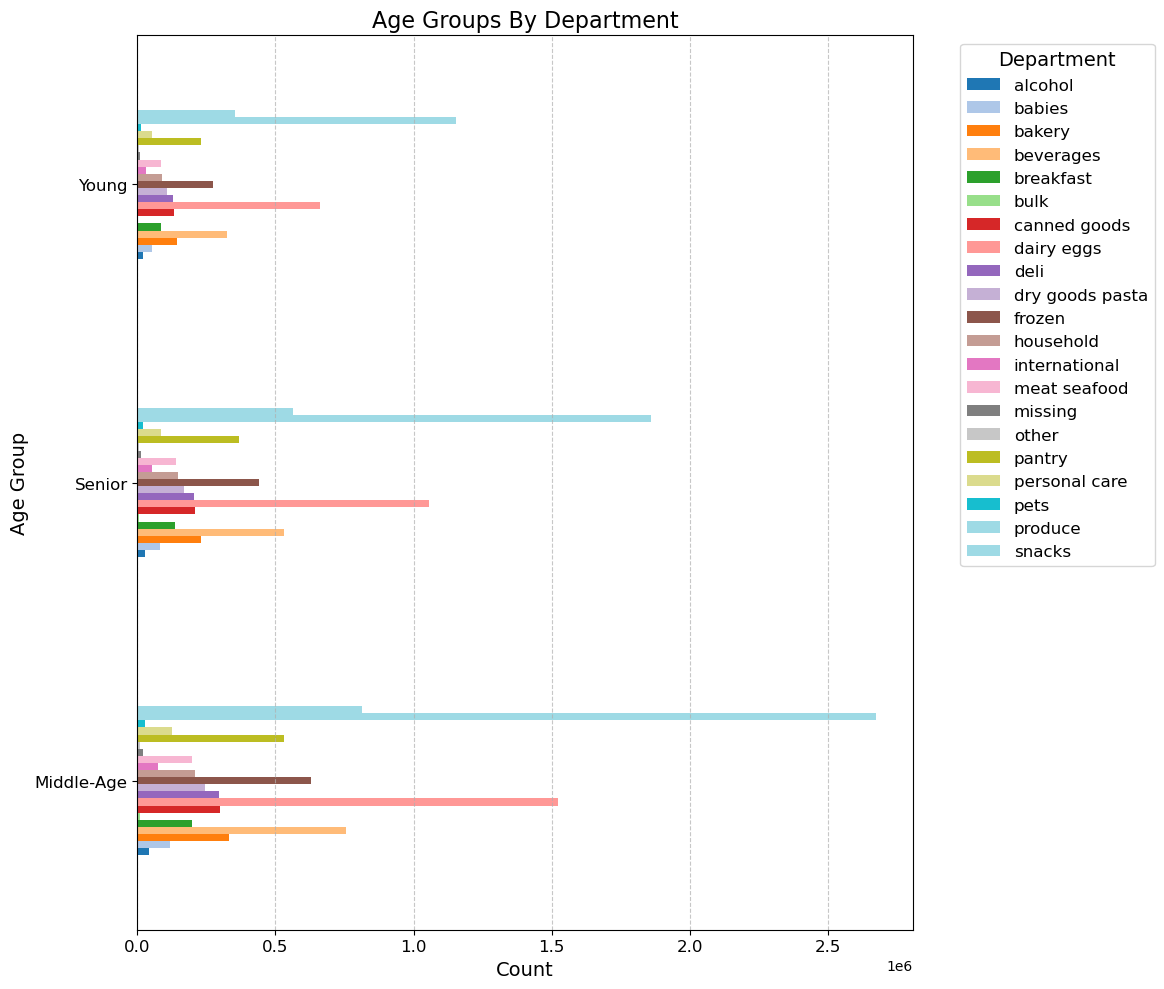

In [25]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)
# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [27]:
age_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_comparison_bar.png'))

### Create crosstab and bar chart to compare income_group profile with departments

In [30]:
income_group_department_comparison = pd.crosstab(big_ords_prods_agg_cust_dept['income_group'],big_ords_prods_agg_cust_dept['department'],dropna=False)

<Figure size 1800x1200 with 0 Axes>

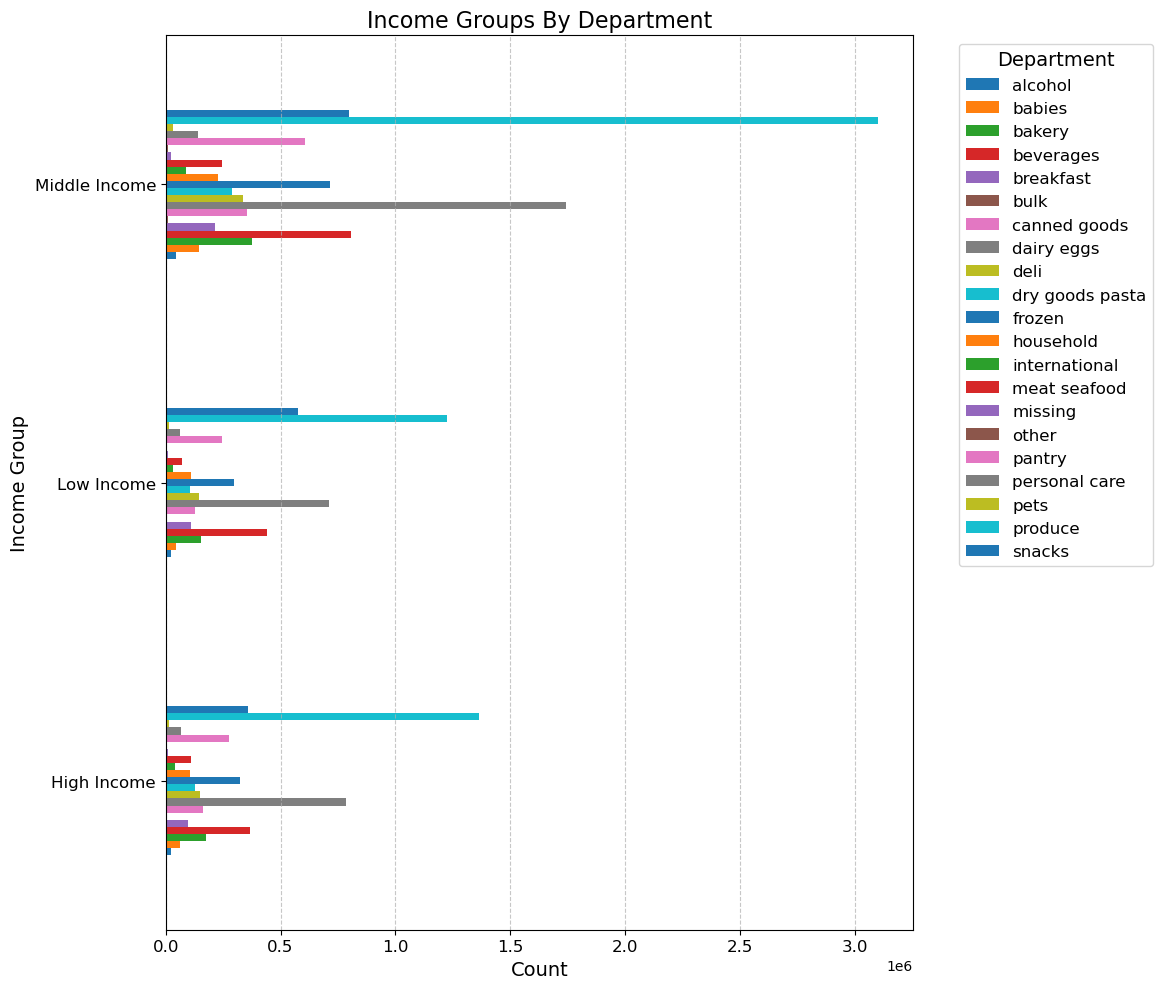

In [38]:
plt.figure(figsize=(18, 12))
income_group_department_comparison_bar = income_group_department_comparison.plot(
    kind='barh',
    figsize=(14, 10),
    rot=0)
# Add title and labels with larger font size
plt.title('Income Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)
# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [40]:
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_department_comparison_bar.png'))

### Create a crosstab and bar chart to compare regions with departments

In [43]:
region_department_comparison = pd.crosstab(big_ords_prods_agg_cust_dept['region'], big_ords_prods_agg_cust_dept['department'], dropna=False)

<Figure size 2000x2500 with 0 Axes>

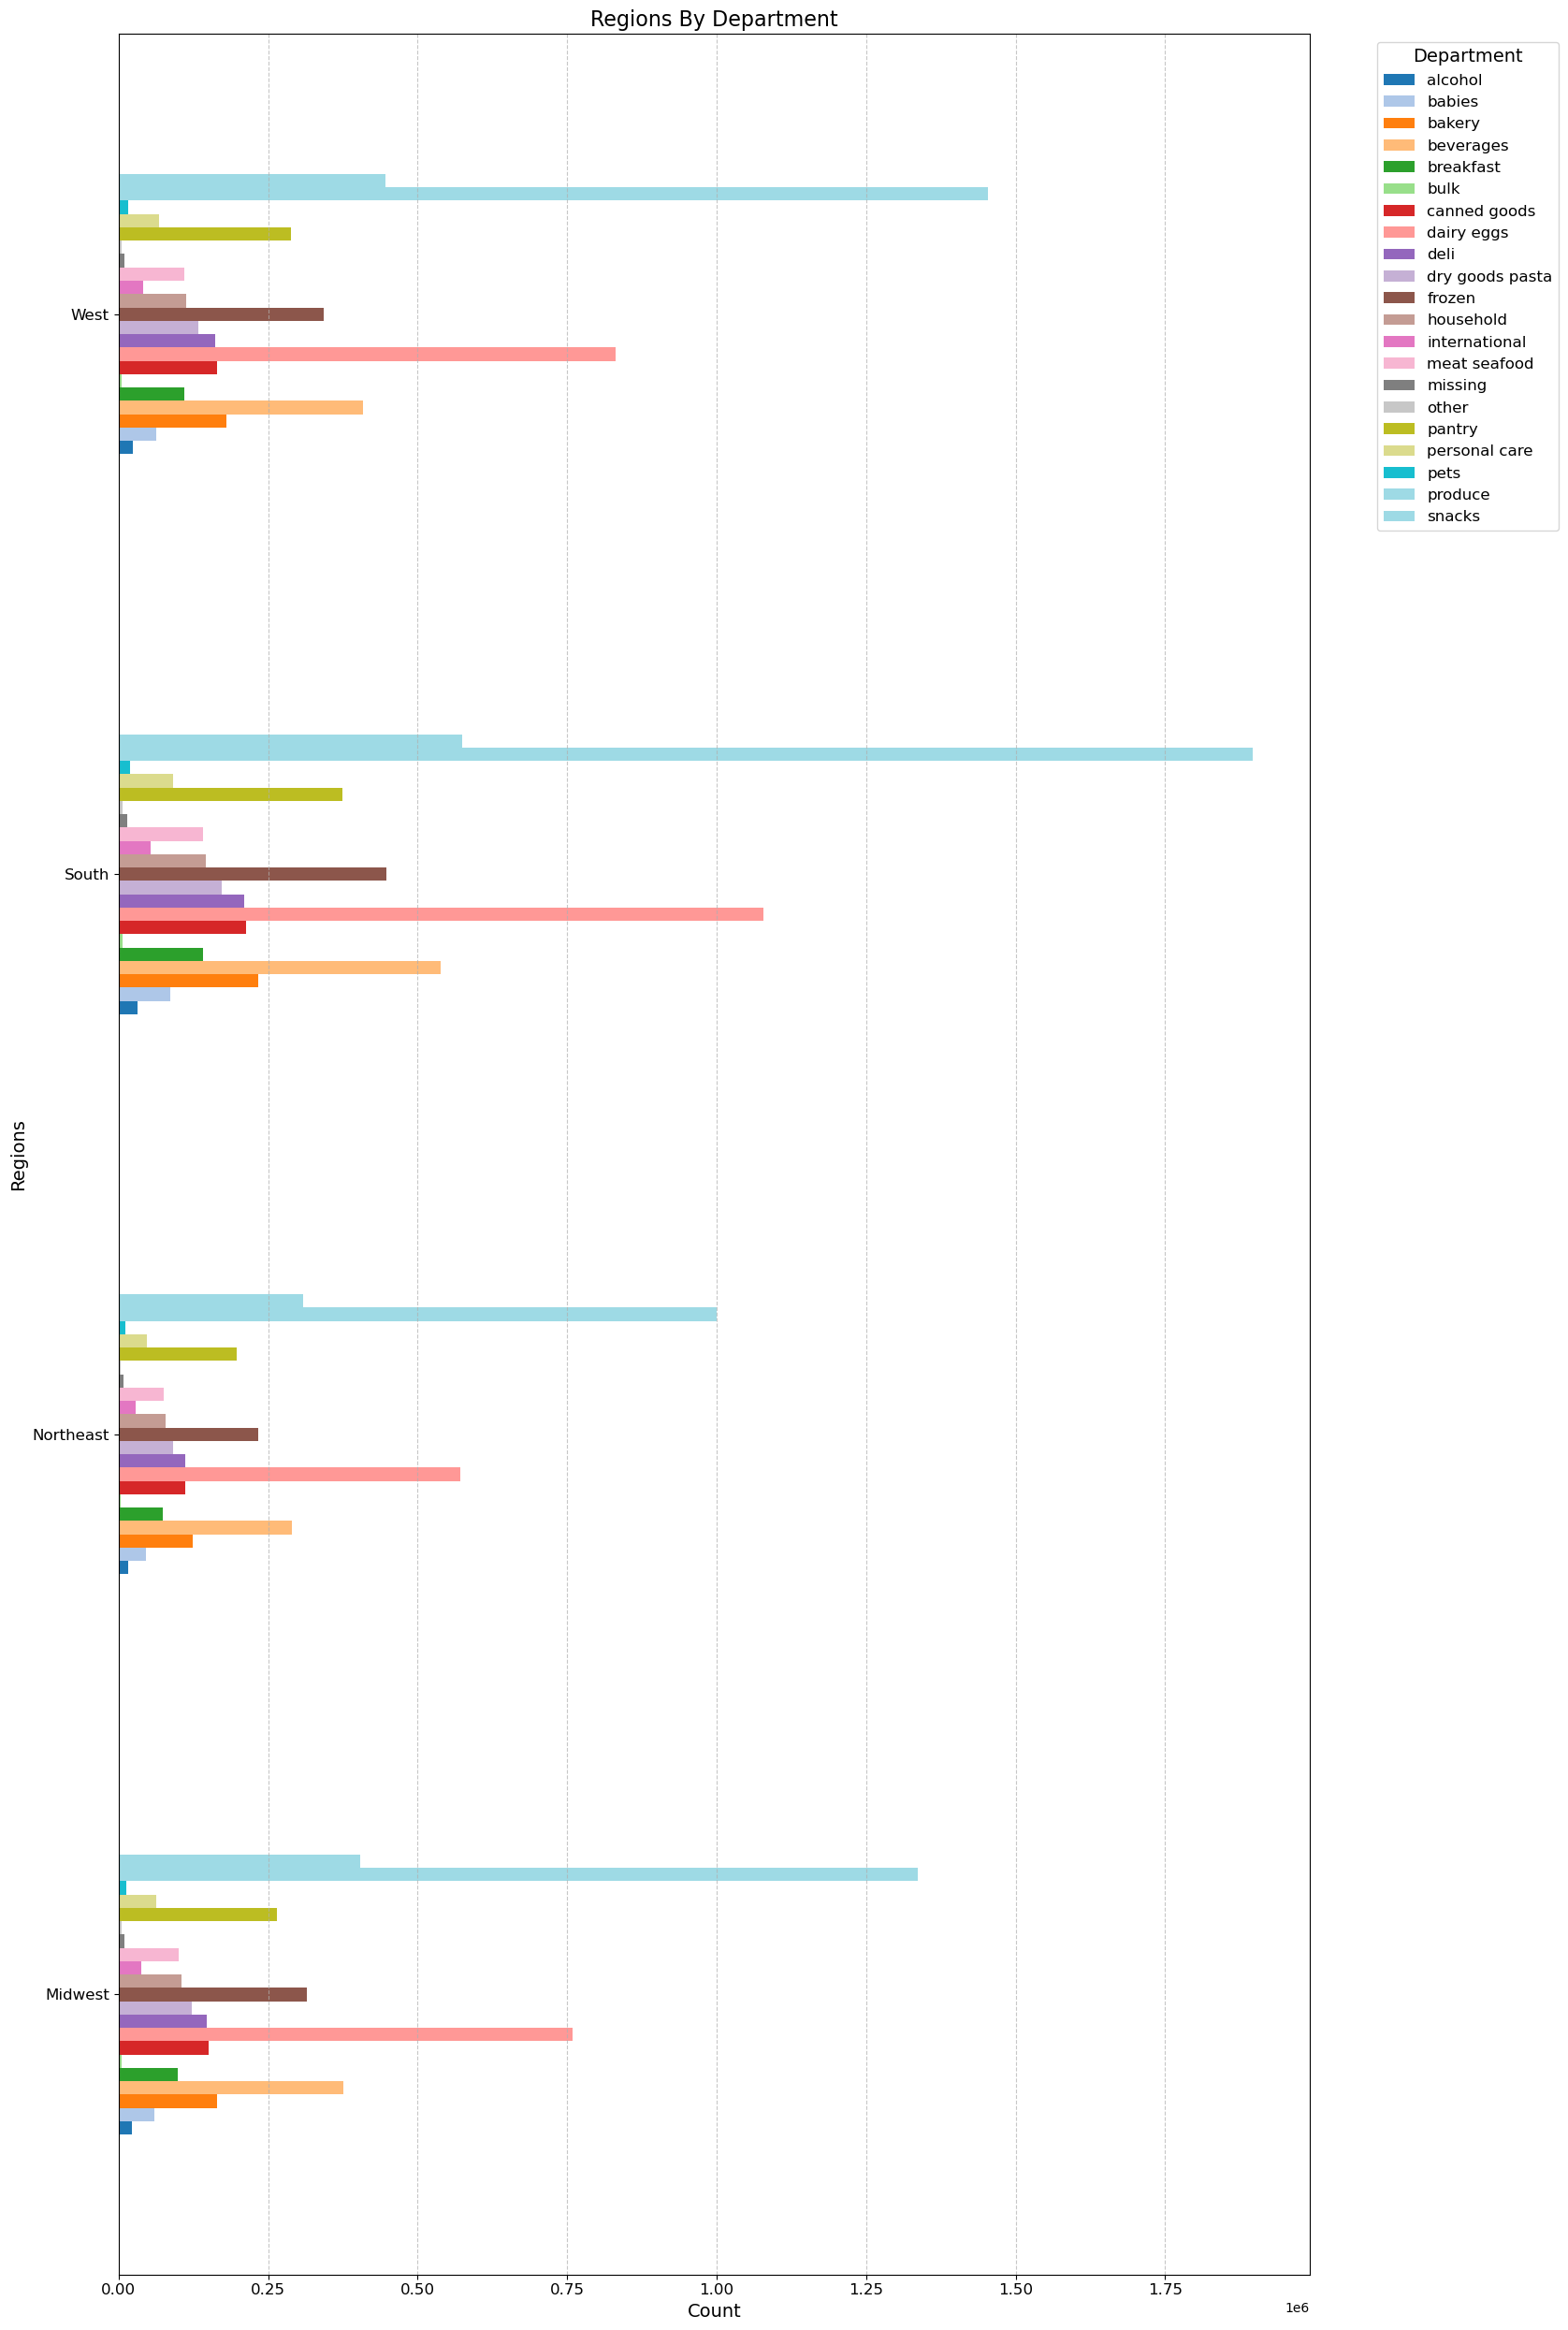

In [45]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)
# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)
# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [47]:
region_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_department_comparison_bar.png'))

### More graphs for analysis

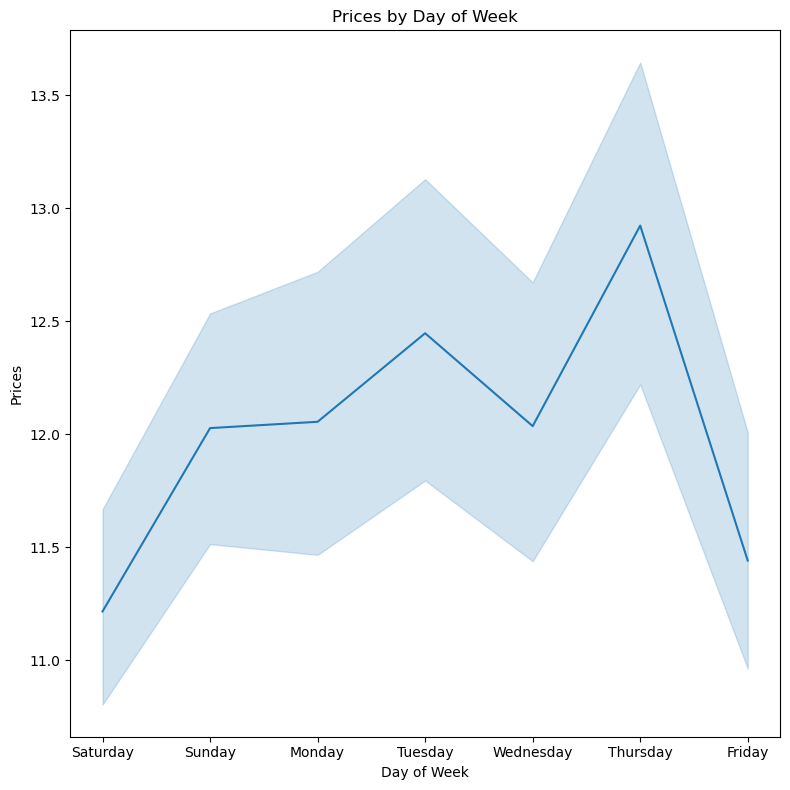

In [54]:
# Create reference day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
# Create Line Chart
plt.figure(figsize=(8, 8))
prices_by_day_of_week_line = sns.lineplot(data=big_ords_prods_agg_cust_dept,x='order_dow',y='prices')
plt.title('Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Prices')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [56]:
prices_by_day_of_week_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_by_day_of_week_line.png'))

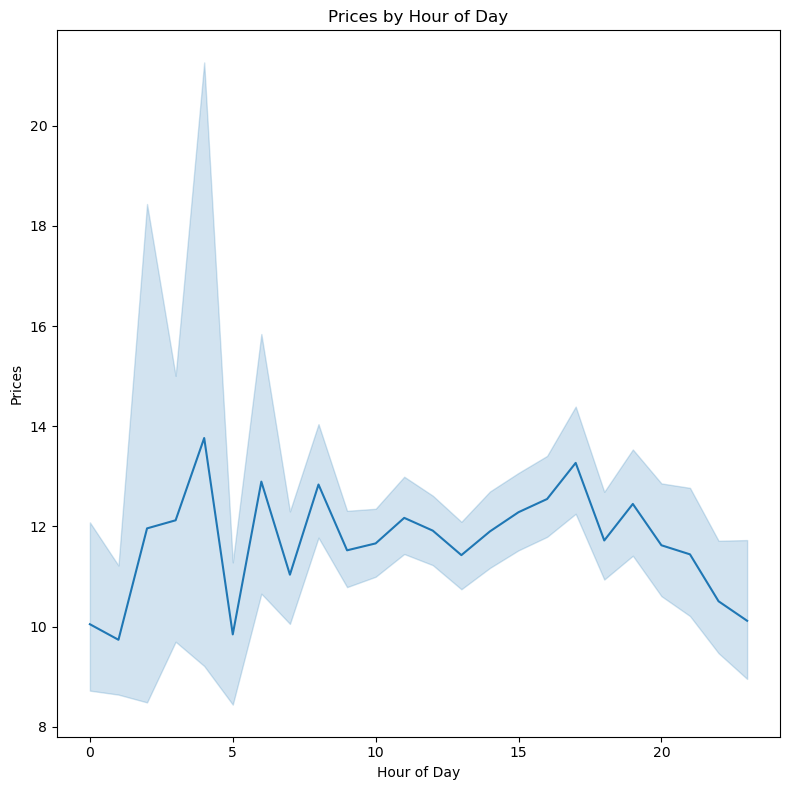

In [60]:
plt.figure(figsize=(8, 8))
prices_by_order_hour_of_day_line=sns.lineplot(data=big_ords_prods_agg_cust_dept,x='order_hour_of_day',y='prices')
plt.title('Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.tight_layout()
plt.show()

In [62]:
prices_by_order_hour_of_day_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_by_order_hour_of_day_line.png'))

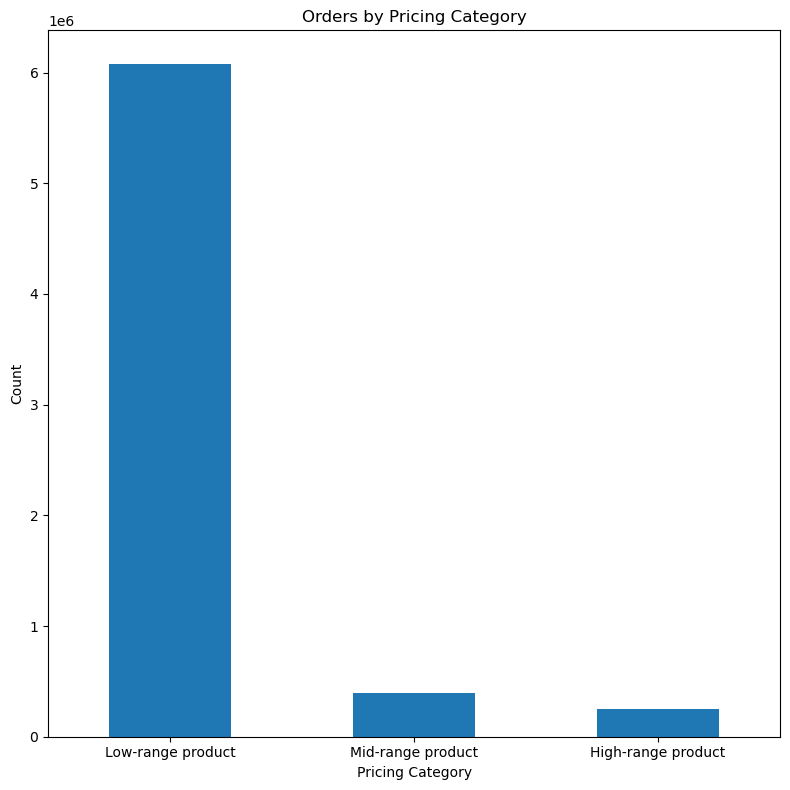

In [66]:
# Create a bar chart for price category
plt.figure(figsize=(8,8))
price_category_bar= big_ords_prods_agg_cust_dept['price_range_loc'].value_counts().plot(kind='bar', rot=0)
plt.title('Orders by Pricing Category')
plt.xlabel('Pricing Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [68]:
price_category_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','price_category_bar.png'))

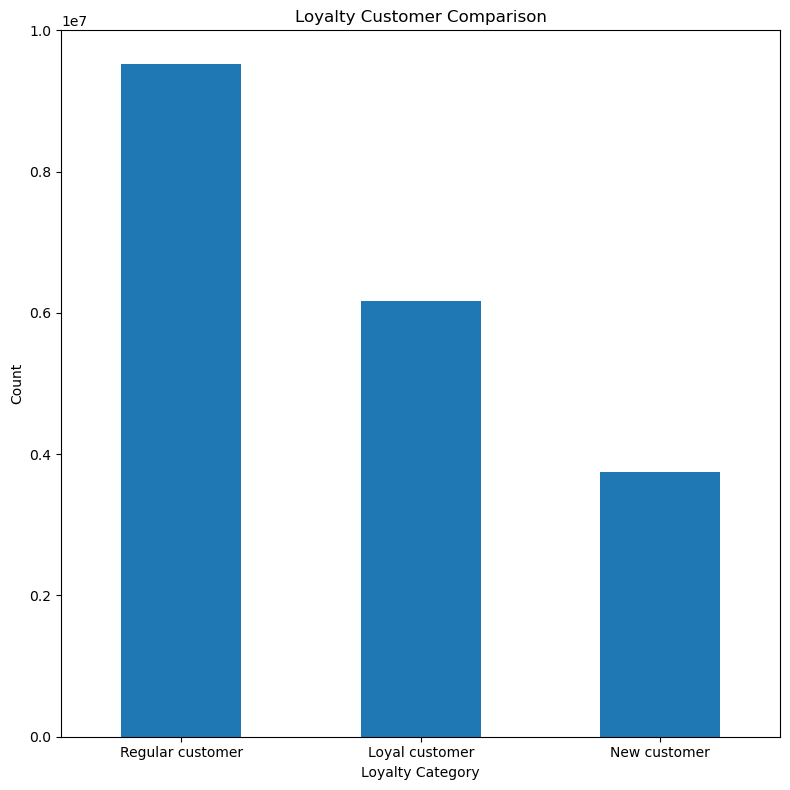

In [70]:
# Create a bar chart for customer loyalty breakdown
plt.figure(figsize=(8,8))
loyalty_customer_comparison_bar= big_ords_prods_agg_cust_dept['loyalty_flag'].value_counts().plot(kind='bar', rot=0)
plt.title('Loyalty Customer Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [72]:
loyalty_customer_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_bar.png'))

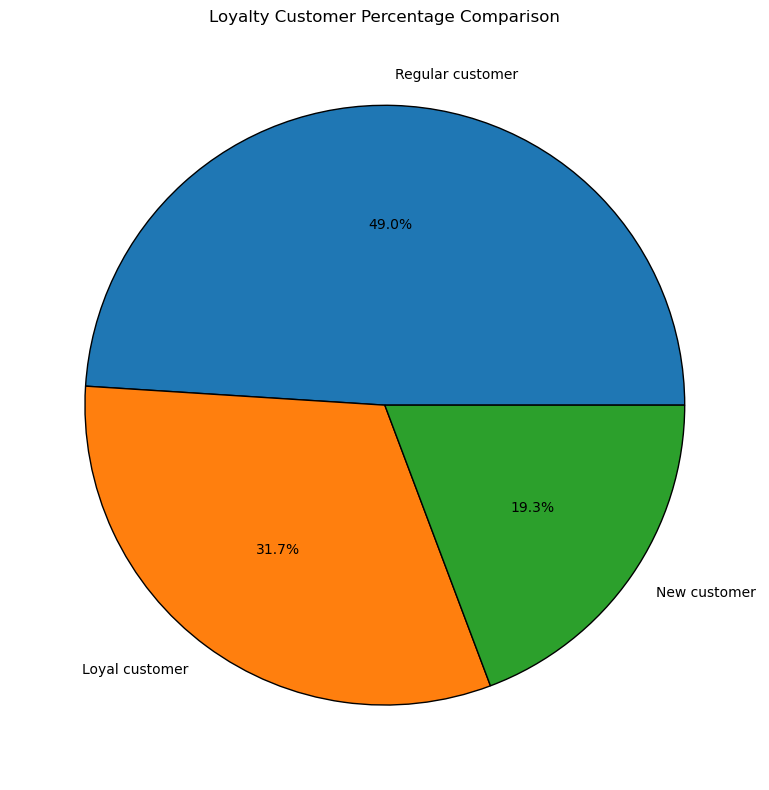

In [74]:
# Create a Pie Chart of customer loyalty breakdown
loyalty_customer_pie= big_ords_prods_agg_cust_dept['loyalty_flag'].value_counts()
plt.figure(figsize=(8,8))
loyalty_customer_comparison_pie=loyalty_customer_pie.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [76]:
loyalty_customer_comparison_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_pie.png'))

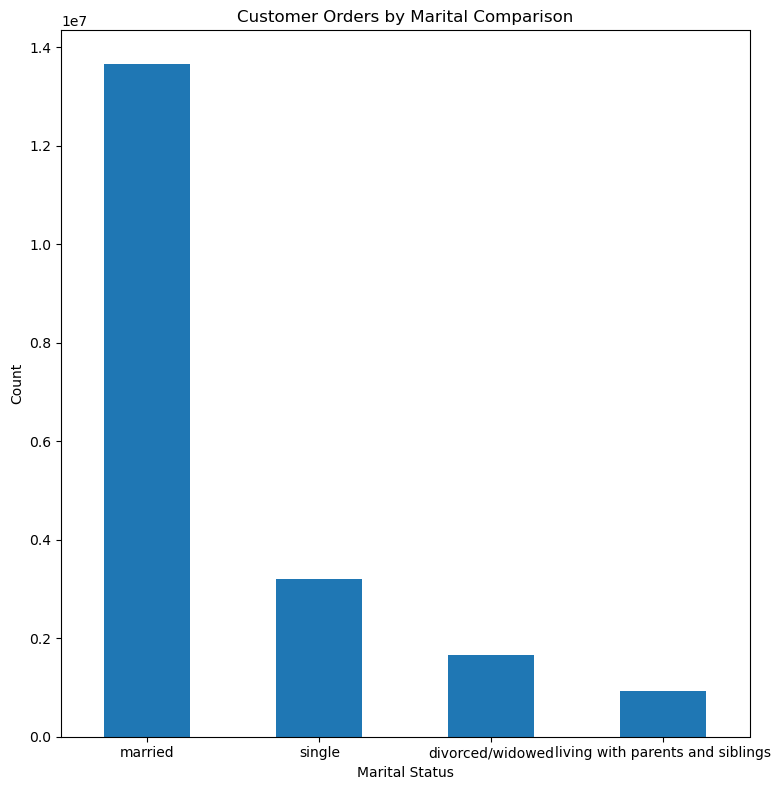

In [78]:
# Create a bar chart for customer marital status breakdown
plt.figure(figsize=(8,8))
marital_status_comparison_bar = big_ords_prods_agg_cust_dept['marital_status'].value_counts().plot(kind='bar', rot=0)
plt.title('Customer Orders by Marital Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [80]:
marital_status_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','marital_status_comparison_bar.png'))

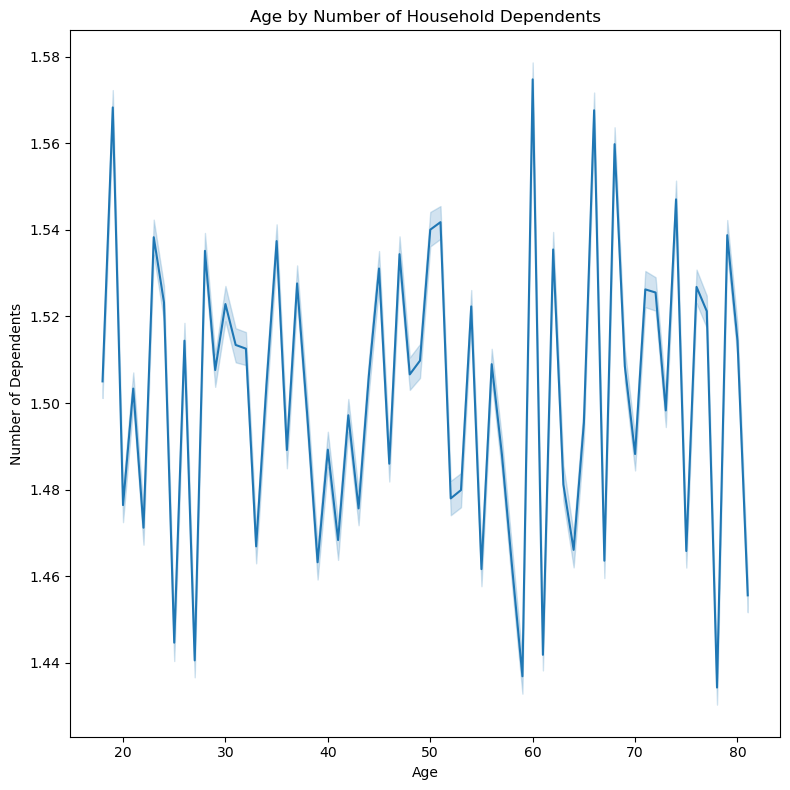

In [86]:
# Create a Line Chart for age by num_of_dependents comparison
plt.figure(figsize=(8, 8))
age_by_dependants_line=sns.lineplot(data=big_ords_prods_agg_cust_dept,x='age',y='n_dependants')
plt.title('Age by Number of Household Dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.tight_layout()
plt.show()

In [88]:
age_by_dependants_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_by_dependants_line.png'))

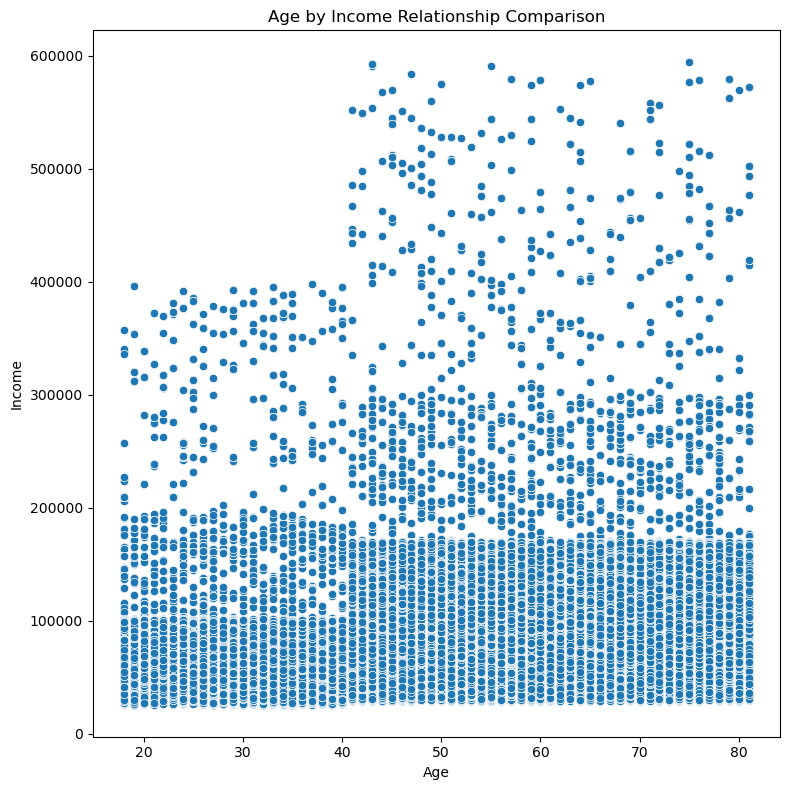

In [90]:
# Create a scatterplot for age by income comparison
plt.figure(figsize=(8, 8))
age_income_comparison_scat=sns.scatterplot(x = 'age', y = 'income', data = big_ords_prods_agg_cust_dept)
plt.title('Age by Income Relationship Comparison')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

In [92]:
age_income_comparison_scat.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income_comparison_scat.png'))

In [96]:
big_ords_prods_agg_cust.shape

(19444665, 40)

In [100]:
big_ords_prods_agg_cust.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'days_most_busy',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 'region',
 'customer_activity_flag',
 'age_group',
 'income_group',
 'dependant_size',
 'week_day_category',
 'order_hour_group']